CODE BLOCK: 1

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net
from utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [10]:
!pip install torchsummary
from torchsummary import summary

device = torch.device("mps")
model = Net()
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,320
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 30, 22, 22]           4,350
              ReLU-8           [-1, 30, 22, 22]               0
       BatchNorm2d-9           [-1, 30, 22, 22]              60
           Conv2d-10           [-1, 30, 11, 11]             930
             ReLU-11           [-1, 30, 11, 11]               0
      BatchNorm2d-12           [-1, 30, 11, 11]              60
           Conv2d-13             [-1, 16, 9, 9]           4,336
             ReLU-14             [-1, 1

CODE BLOCK: 3

In [11]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [12]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:01<00:00, 6754686.69it/s] 


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1568688.49it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 1682603.25it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5748499.93it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [13]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

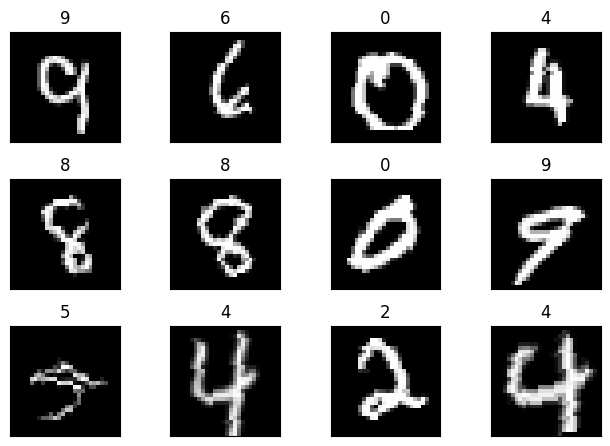

In [14]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [15]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=0.1707 Batch_id=117 Accuracy=86.16: 100%|██████████| 118/118 [00:12<00:00,  9.73it/s]


Test set: Average loss: 0.1010, Accuracy: 9710/10000 (97.10%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.0598 Batch_id=117 Accuracy=97.78: 100%|██████████| 118/118 [00:08<00:00, 14.35it/s]


Test set: Average loss: 0.0509, Accuracy: 9851/10000 (98.51%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.0275 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [00:08<00:00, 14.45it/s]


Test set: Average loss: 0.0324, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.0924 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:08<00:00, 14.48it/s]


Test set: Average loss: 0.0353, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.0505 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:08<00:00, 14.45it/s]


Test set: Average loss: 0.0252, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.0846 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [00:08<00:00, 14.43it/s]


Test set: Average loss: 0.0283, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 7


Train: Loss=0.0619 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:08<00:00, 14.47it/s]


Test set: Average loss: 0.0244, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 8


Train: Loss=0.1067 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [00:08<00:00, 14.42it/s]


Test set: Average loss: 0.0228, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 9


Train: Loss=0.0478 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:08<00:00, 14.40it/s]


Test set: Average loss: 0.0219, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 10


Train: Loss=0.0240 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:08<00:00, 14.38it/s]


Test set: Average loss: 0.0203, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 11


Train: Loss=0.0192 Batch_id=117 Accuracy=99.26: 100%|██████████| 118/118 [00:08<00:00, 14.36it/s]


Test set: Average loss: 0.0169, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 12


Train: Loss=0.0026 Batch_id=117 Accuracy=99.32: 100%|██████████| 118/118 [00:08<00:00, 14.25it/s]


Test set: Average loss: 0.0165, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 13


Train: Loss=0.0157 Batch_id=117 Accuracy=99.31: 100%|██████████| 118/118 [00:08<00:00, 14.26it/s]


Test set: Average loss: 0.0160, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 14


Train: Loss=0.0381 Batch_id=117 Accuracy=99.39: 100%|██████████| 118/118 [00:08<00:00, 14.16it/s]


Test set: Average loss: 0.0164, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 15


Train: Loss=0.0160 Batch_id=117 Accuracy=99.35: 100%|██████████| 118/118 [00:08<00:00, 14.11it/s]


Test set: Average loss: 0.0161, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 16


Train: Loss=0.0137 Batch_id=117 Accuracy=99.37: 100%|██████████| 118/118 [00:08<00:00, 13.75it/s]


Test set: Average loss: 0.0160, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 17


Train: Loss=0.1291 Batch_id=117 Accuracy=99.35: 100%|██████████| 118/118 [00:08<00:00, 14.05it/s]


Test set: Average loss: 0.0161, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 18


Train: Loss=0.0190 Batch_id=117 Accuracy=99.42: 100%|██████████| 118/118 [00:08<00:00, 13.94it/s]


Test set: Average loss: 0.0161, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 19


Train: Loss=0.0319 Batch_id=117 Accuracy=99.37: 100%|██████████| 118/118 [00:08<00:00, 14.05it/s]


Test set: Average loss: 0.0163, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 20


Train: Loss=0.0112 Batch_id=117 Accuracy=99.38: 100%|██████████| 118/118 [00:08<00:00, 13.99it/s]


Test set: Average loss: 0.0162, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 5.0000e-04.


[]

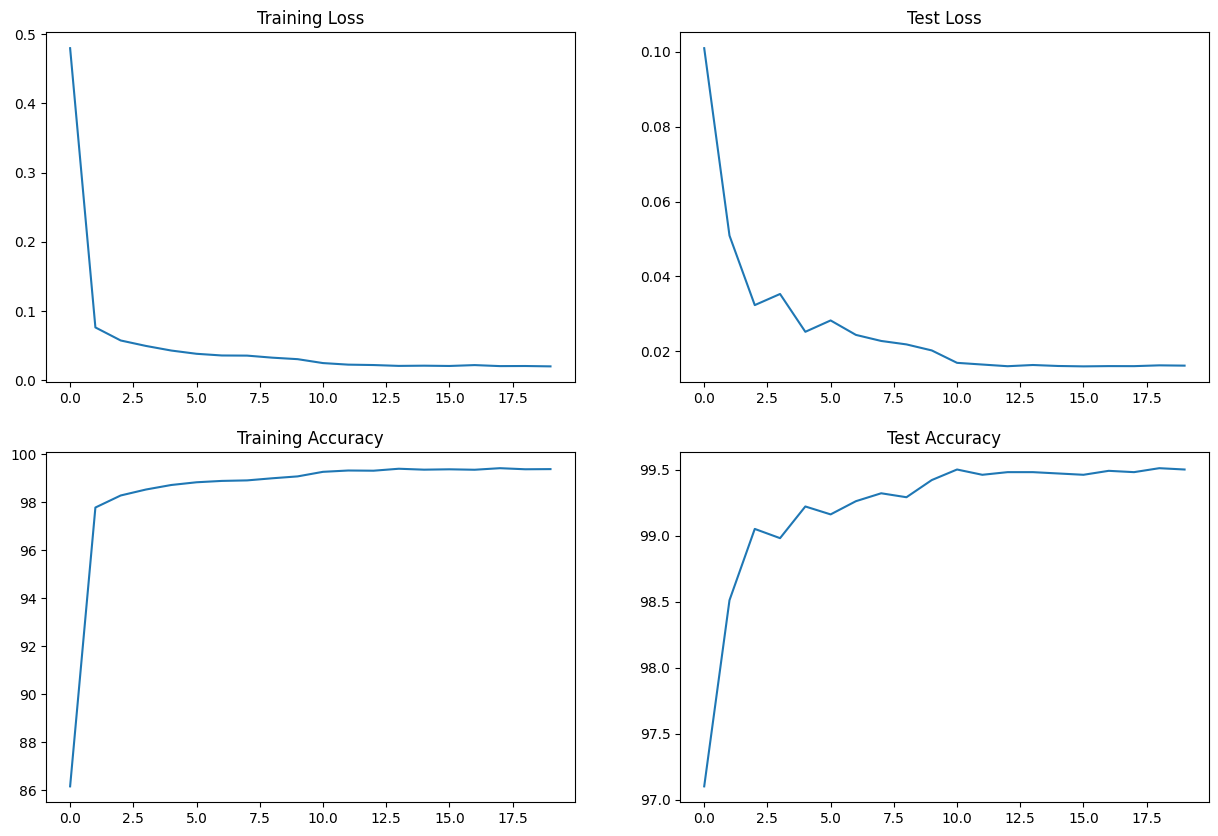

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()